# PUBG - PLAYER UNKNOWN'S BATTLEGROUND

![](download.jpg)

### The official PLAYER UNKNOWN'S BATTLEGROUNDS designed exclusively for mobile. Play free anywhere, anytime. PUBG MOBILE delivers the most intense free-to-play multiplayer action on mobile. Drop in, gear up, and compete. Survive epic 100-player classic battles, payload mode and fast-paced 4v4 team deathmatch and zombie modes. Survival is key and the last one standing wins. When duty calls, fire at will!

**PUBG (Player Unknown's Battlegrounds)** is a hugely successful and popular online shooter game. It's of so-called "battle royale" type - the game ends when the last team stays alive on a map.  The difference to the normal deathmatch is that after you are killed in battle royale game you're not re-spawned anymore (perma-death). Here is the [official game site](https://www.pubg.com/).

1. FREE ON MOBILE - Powered by the Unreal Engine 4. Play console quality gaming on the go. Delivers jaw-dropping HD graphics and 3D sound. Featuring customizable mobile controls, training modes, and voice chat. Experience the most smooth control and realistic ballistics, weapon behavior on mobile.

2. MASSIVE BATTLE MAPS - From Erangel to Miramar, Vikendi to Sanhok, compete on these enormous and detailed battlegrounds varying in size, terrain, day/night cycles and dynamic weather – from urban city spaces to frozen tundra, to dense jungles, master each battleground's secrets to create your own strategic approach to win.

3. DEPTH AND VARIETY – From the 100-player classic mode, the exhilarating payload mode to the lightning-fast Arcade and 4v4 Team Deathmatch modes, as well as the intense Zombie modes. There is something for everyone! There is something for everyone. Play Solo, Duo, and in 4-player Squads. Fire your weapon to your heart's content! Be a lone wolf soldier or play with a Clan and answer the duty calls when help is needed! Offers FPS (First-Person Shooter) and TPS (Third-Person Shooter) play, lots of vehicles for all the different terrains in the game and an arsenal of realistic weapons. Find your perfect ride and pieces to cruise towards the final circle!

#### **Content:**
* 1-[Database description](#1)
* 2-[Exploratory Analysis](#2)
    * a-[Match types](#3)
    * b-[Kills and damage dealt](#4)
    * c-[Maximum distances](#5)
    * d-[Driving vs. Walking](#6)
    * e-[Weapons acquired](#7)
    * f-[Correlation map](#8)
* 3-[Analysis of TOP10% of players](#9)


OK, let's see what's inside. I will load some basic libraries first.

## 1-Database description <a id="1"></a> <br>


In [1]:
#Importing necessary Libraries
import numpy as np                    #linear algebra
import pandas as pd                   #dtabase manipulation
import matplotlib.pyplot as plt       #plotting libraries
import seaborn as sns                 #nice graphs and plots
import warnings                       #libraries to deal with warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading raw training data.
df= pd.read_csv('data.csv')

In [3]:
#The first glance at the data. Below the first 5 rows:
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [4]:
# shape of dataset
df.shape

(1111742, 30)

In total we have:
* 29 columns
* 4 446 966 observations (rows)

In [5]:
# List of columns
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

For better understanding of database below there is a columns descriptions:

*     **groupId** - Players team ID
*     **matchId** - Match ID
*     **assists** - Number of assisted kills. The killed is actually scored for the another teammate.
*     **boosts** - Number of boost items used by a player. These are for example: energy dring, painkillers, adrenaline syringe.
*     **damageDealt** - Damage dealt to the enemy
*     **DBNOs** - Down But No Out - when you lose all your HP but you're not killed yet. All you can do is only to crawl.
*     **headshotKills** - Number of enemies killed with a headshot
*     **heals** - Number of healing items used by a player. These are for example: bandages, first-aid kits
*     **killPlace** - Ranking in a match based on kills.
*     **killPoints** - Ranking in a match based on kills points.
*     **kills** - Number of enemy players killed.
*     **killStreaks** - Max number of enemy players killed in a short amount of time.
*     **longestKill** - Longest distance between player and killed enemy.
*     **matchDuration** - Duration of a mach in seconds.
*     **matchType** - Type of match. There are three main modes: Solo, Duo or Squad. In this dataset however we have much more categories.
*     **maxPlace** - The worst place we in the match.
*     **numGroups** - Number of groups (teams) in the match.
*     **rankPoints** - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next                            version, so use with caution. Value of -1 takes the place of “None”.
*     **revives** - Number of times this player revived teammates.
*     **rideDistance** - Total distance traveled in vehicles measured in meters.
*     **roadKills** - Number of kills from a car, bike, boat, etc.
*     **swimDistance** - Total distance traveled by swimming (in meters).
*     **teamKills** - Number teammate kills (due to friendly fire).
*     **vehicleDestroys** - Number of vehicles destroyed.
*     **walkDistance** - Total distance traveled on foot measured (in meters).
*     **weaponsAcquired** - Number of weapons picked up.
*     **winPoints** - Ranking in a match based on won matches.

And our target column:
*     **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place,                             and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it                          is possible to have missing chunks in a match.



In [6]:
#Let's create some basic descriptive statistics for each column. These will be usefull to set the visualisation parameters, to filter out the outliers and to get the feeling about the ranges/scales.
df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [7]:
#Now, let's check if there are any missing data.
df.isna().sum().to_frame()

,0
Unnamed: 0,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0


Nice - it looks we do not have any missing values. That's a perfect starting point for EDA and for ML as well.

## 2-Exploratory Data Analysis

### a) Match types 

In [9]:
no_matches = df.loc[:,"matchId"].nunique()
print("There are {} matches registered in our database.".format(no_matches))

There are 47951 matches registered in our database.


In [10]:
m_types = df.loc[:,"matchType"].value_counts().to_frame().reset_index()
m_types.columns = ["Type","Count"]
m_types

,Type,Count
0,squad-fpp,438781
1,duo-fpp,249927
2,squad,156573
3,solo-fpp,133854
4,duo,78039
5,solo,45679
6,normal-squad-fpp,4286
7,crashfpp,1581
8,normal-duo-fpp,1400
9,flaretpp,633


In PUBG there are essentially three main modes of game: **Solo**, **Duo** and **Squad**. 

In a squad mode, you play in a group of 4 players. Here we can see that the match types are further broken down taking into account view modes:
* FPP - First Person Perspective
* TPP - Thirst Peron Perspective
* Normal - you can switch between views during a game
However, I am not able to identify what flare- and crash- types of matches are.

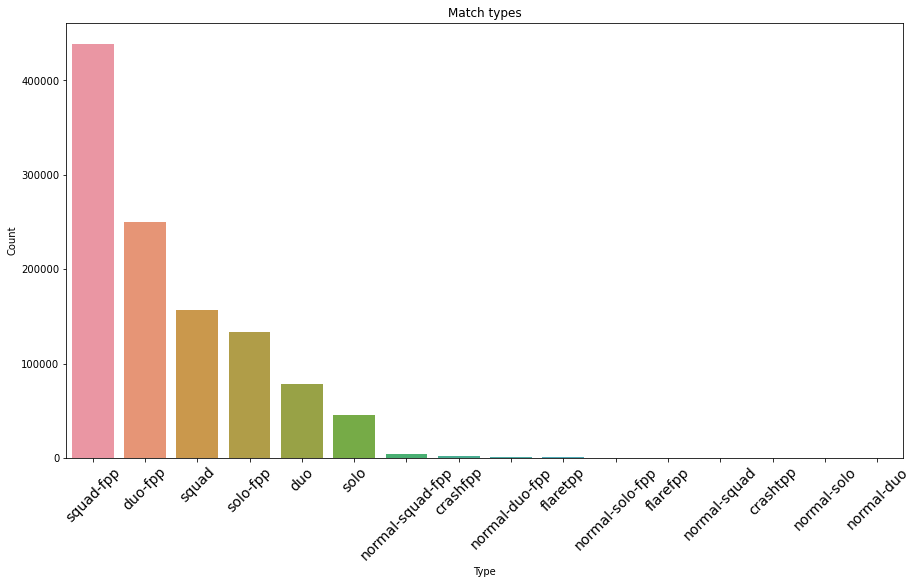

In [11]:
plt.figure(figsize=(15,8))
ticks = m_types.Type.values
ax = sns.barplot(x="Type", y="Count", data=m_types)
ax.set_xticklabels(ticks, rotation=45, fontsize=14)
ax.set_title("Match types")
plt.show()

The graph above shows that the most popular game modes are squad and duo. Next I will aggregate all these individual types into three main categories (squad, duo and solo).

In [13]:
m_types2 = df.loc[:,"matchType"].value_counts().to_frame()
aggregated_squads = m_types2.loc[["squad-fpp","squad","normal-squad-fpp","normal-squad"],"matchType"].sum()
aggregated_duos = m_types2.loc[["duo-fpp","duo","normal-duo-fpp","normal-duo"],"matchType"].sum()
aggregated_solo = m_types2.loc[["solo-fpp","solo","normal-solo-fpp","normal-solo"],"matchType"].sum()
aggregated_mt = pd.DataFrame([aggregated_squads,aggregated_duos,aggregated_solo], index=["squad","duo","solo"], columns =["count"])
aggregated_mt

,count
squad,599775
duo,329414
solo,180073


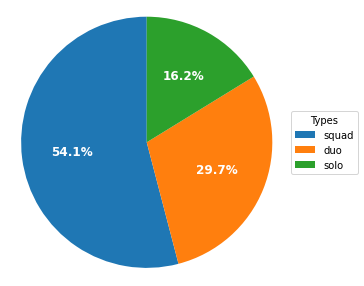

In [14]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
labels = ['squad', 'duo', 'solo']

wedges, texts, autotexts = ax1.pie(aggregated_mt["count"],textprops=dict(color="w"), autopct='%1.1f%%', startangle=90)

ax1.axis('equal')
ax1.legend(wedges, labels,
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.show()

The pie chart above shows that over 54% of all the matches was played in squad mode

### b) Kills and damage dealt 

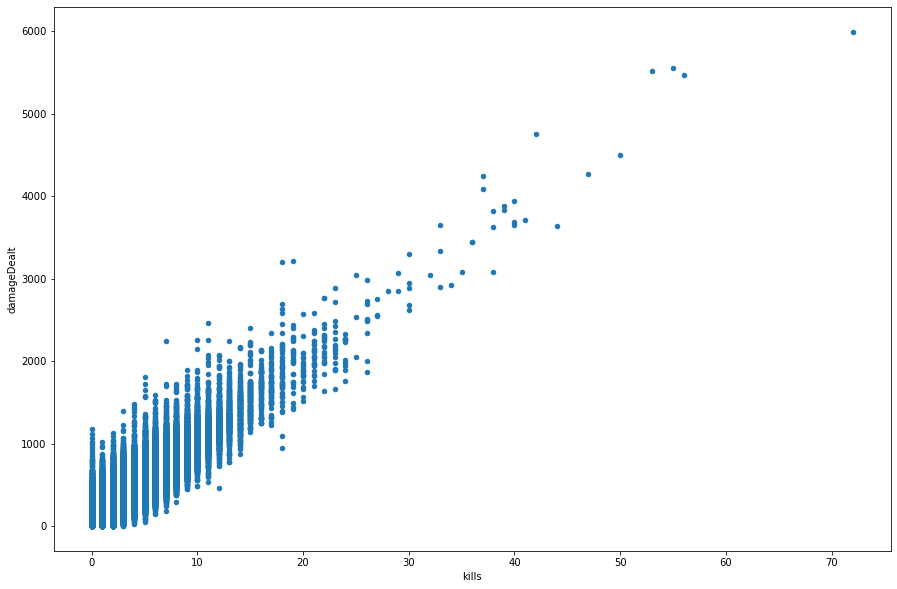

In [16]:
df.plot(x="kills",y="damageDealt", kind="scatter", figsize = (15,10))
plt.show()

There is an obvious correlation between number of kills and damage dealt. We see also that there are some outliers. The maximum kills is 60 which is much bigger than the wast majority of players get.

Now let's see what are the distances at which enemies were killed.

#### Let's look at our kills master:

In [19]:
df[df['kills']>60]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
758017,3431247,06308c988bf0c2,4c4ee1e9eb8b5e,6680c7c3d17d48,7,4,5990.0,0,64,10,...,0,0.0,0,0.0,0,0,728.1,35,0,1.0


There is an obvious correlation between number of kills and damage dealt. We see also that there are some outliers. The maximum kills is 60 which is much bigger than the wast majority of players get.

#### Now let's see at headshoots statistics as this is one of the most satisfying thing you can score during a game. Players without any headshoot kills are filtered out.

Maximum number of headshots that the player scored: 64


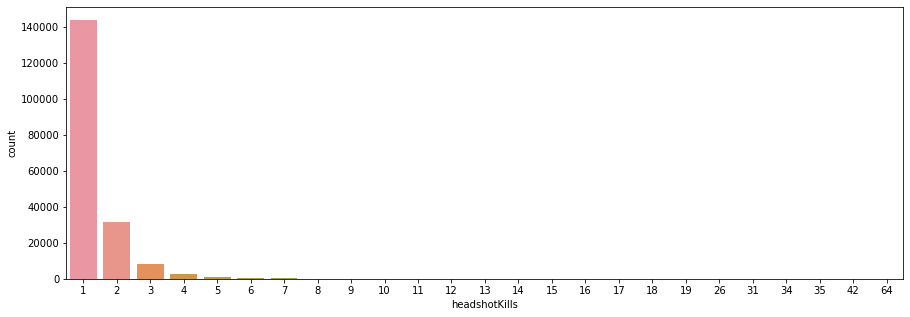

In [20]:
headshots = df[df['headshotKills']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshots['headshotKills'].sort_values())
print("Maximum number of headshots that the player scored: " + str(df["headshotKills"].max()))

#### DBNO - Down But Not Out. How many enemies DBNOs an average player scores.

Mean number of DBNOs that the player scored: 0.6573611503388376


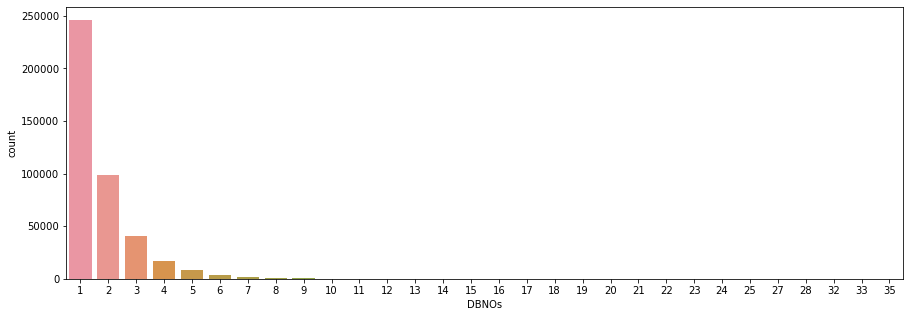

In [23]:
headshots = df[df['DBNOs']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshots['DBNOs'].sort_values())
print("Mean number of DBNOs that the player scored: " + str(df["DBNOs"].mean()))

#### Is there a correlation between DBNOs and kills?

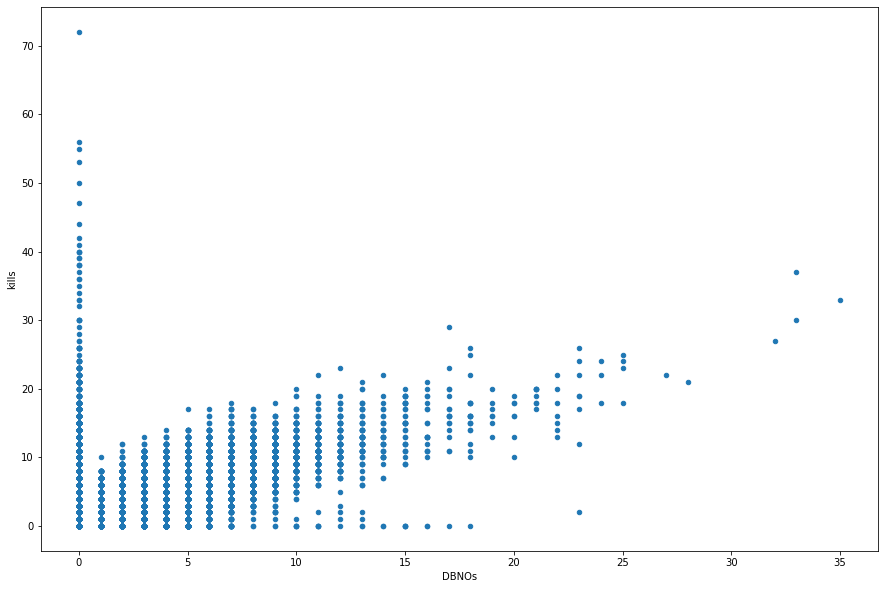

In [24]:
df.plot(x="DBNOs",y="kills", kind="scatter", figsize = (15,10))
plt.show()

It seems that DBNOs are correlated with kills. That makes sense as usually if player is not killed by headshoot yu have to finish him while he's in DBNO state.

### c) Maximum distances 
Range is filtered to a resonable kill distance, e.g. 200 meters. To give you the feeling about distances in the game I prepared a small comparison in the picture below. On the left side the building I'm aiming at is approximately 100m away, on the right side around 200m.

![Imgur](https://i.imgur.com/js8kQpU.jpg)

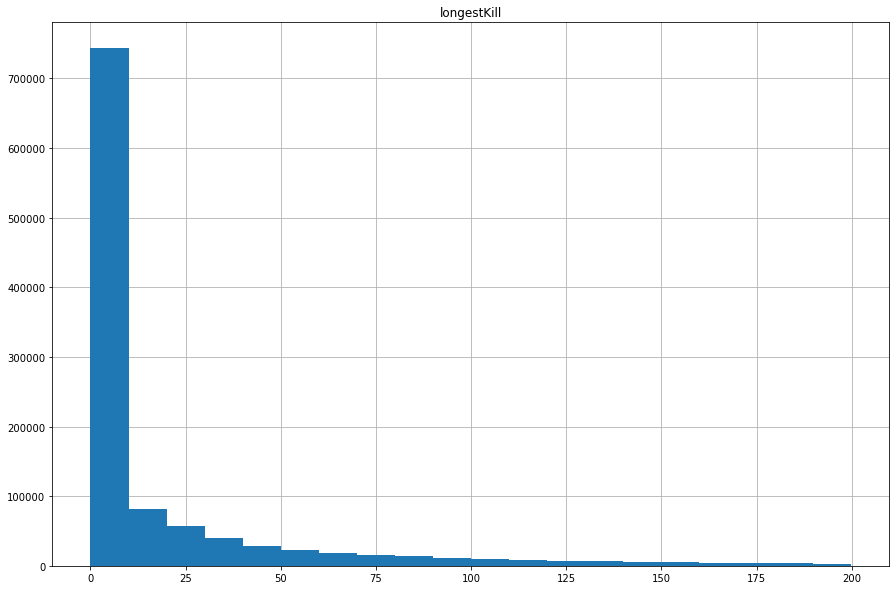

In [27]:
dist = df[df['longestKill']<200]
plt.rcParams['axes.axisbelow'] = True
dist.hist('longestKill', bins=20, figsize = (15,10))
plt.show()

In [29]:
print("Average longest kill distance a player achieve is {:.1f}m, 95% of them not more than {:.1f}m and a maximum distance is {:.1f}m." .format(df['longestKill'].mean(),df['longestKill'].quantile(0.95),df['longestKill'].max()))

Average longest kill distance a player achieve is 23.0m, 95% of them not more than 125.9m and a maximum distance is 1040.0m.


Longest kill of 1094m seems a bit unrealistic (cheater?) but from another side with a 8x scope, a static target, very good position and a lot of luck it is possible.

To get a scale the entire Miramar map is 8x8km and 1300 meters is about like shooting from La Bendita crater to Impala city. Below the picture showing this in practice.
![Imgur](https://i.imgur.com/7WzRzkQ.jpg)

### d) Driving vs. Walking
I filtered data to exclude for players who don't ride at all and don't walk. 

In [32]:
walk0 = df["walkDistance"] == 0
ride0 = df["rideDistance"] == 0
swim0 = df["swimDistance"] == 0
print("{} of players didn't walk at all, {} players didn't drive and {} didn't swim." .format(walk0.sum(),ride0.sum(),swim0.sum()))

24936 of players didn't walk at all, 827573 players didn't drive and 1039125 didn't swim.


Above numbers indicate that there is a significant number of players who didn't walk at all. We should think how to interpret these record. It is obvious that you have to walk just a little bit in order to play this game (to get to a car at least). Are this disconnected players? If yes they shouldn't score any points. Let's check this.

Average place of non-walking players is 0.045, minimum is 0.0 and the best is 1.0, 95% of players has a score below 0.2553.


array([[<AxesSubplot:title={'center':'winPlacePerc'}>]], dtype=object)

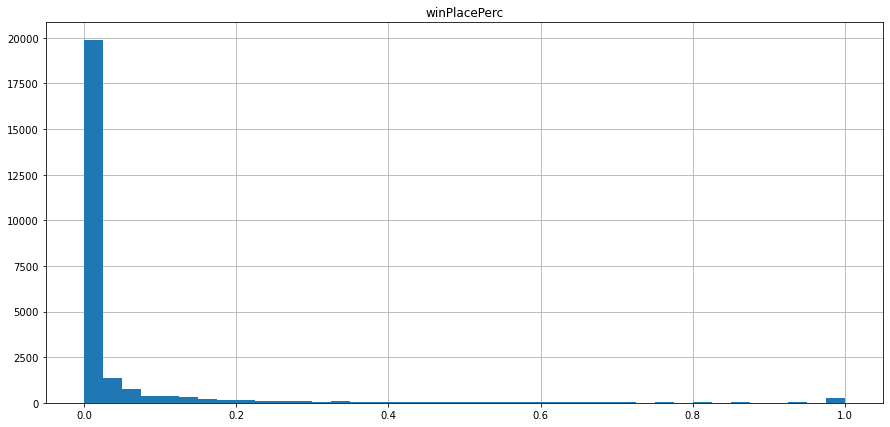

In [33]:
walk0_rows = df[walk0]
print("Average place of non-walking players is {:.3f}, minimum is {} and the best is {}, 95% of players has a score below {}." 
      .format(walk0_rows["winPlacePerc"].mean(), walk0_rows["winPlacePerc"].min(), walk0_rows["winPlacePerc"].max(),walk0_rows["winPlacePerc"].quantile(0.95)))
walk0_rows.hist('winPlacePerc', bins=40, figsize = (15,7))

As we see most of the non-walking players score only last places. However, few of them got better places and a few even the top ones. This may be indication of presence of famous **cheaters**! Let's print couple of suspicious row.

In [34]:
suspects = df.query('winPlacePerc ==1 & walkDistance ==0').head()
suspects.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
5585,1573958,1ed752158c7bbc,338d6ab3bf5f19,4c6b1a0e4cb346,1,0,369.60,0,1,2,...,0,0.0,0,0.0,2,0,0.0,27,0,1.0
10034,1835951,ac43d9729a0605,c5f3b9e5fe1534,4202c9c526d2ad,0,0,38.48,0,0,0,...,0,0.0,0,0.0,0,0,0.0,6,0,1.0
10092,3803166,861fd334addd94,15ba030fd830cc,ed41b4340cd7af,1,0,524.40,0,0,2,...,0,0.0,0,0.0,0,0,0.0,14,1500,1.0
11952,1514773,974ce8673463bd,12ede3fef1318a,832accc40ad0e1,0,0,12.00,0,0,0,...,0,0.0,0,0.0,0,0,0.0,2,0,1.0
12242,2607907,62b4377d5c88e5,41ee1c036b0ffa,7d9d4b051fd1be,0,0,22.52,0,0,0,...,0,0.0,0,0.0,0,0,0.0,11,0,1.0


In [35]:
print("Maximum ride distance for suspected entries is {:.3f} meters, and swim distance is {:.1f} meters." .format(suspects["rideDistance"].max(), suspects["swimDistance"].max()))

Maximum ride distance for suspected entries is 0.000 meters, and swim distance is 0.0 meters.


Interestingly, all of the columns connected to travelling are zero.

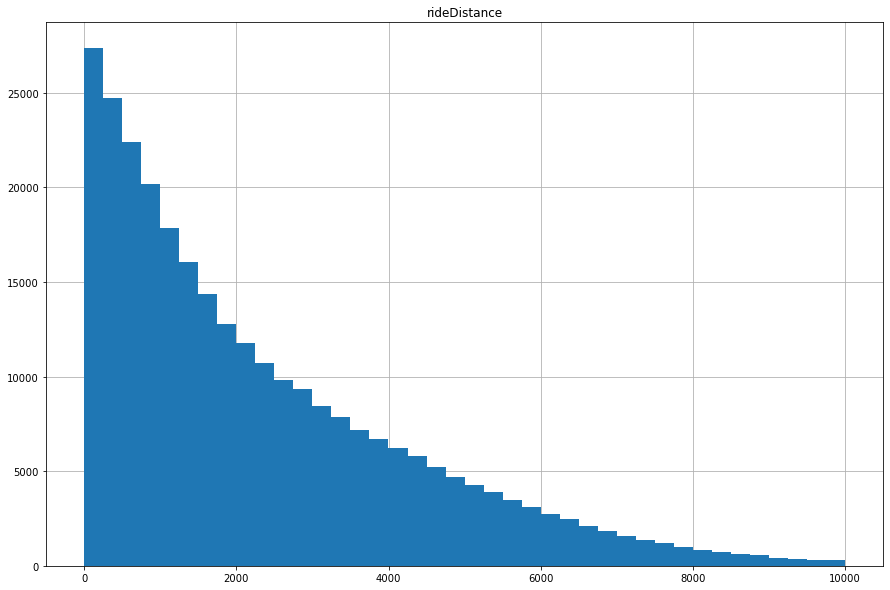

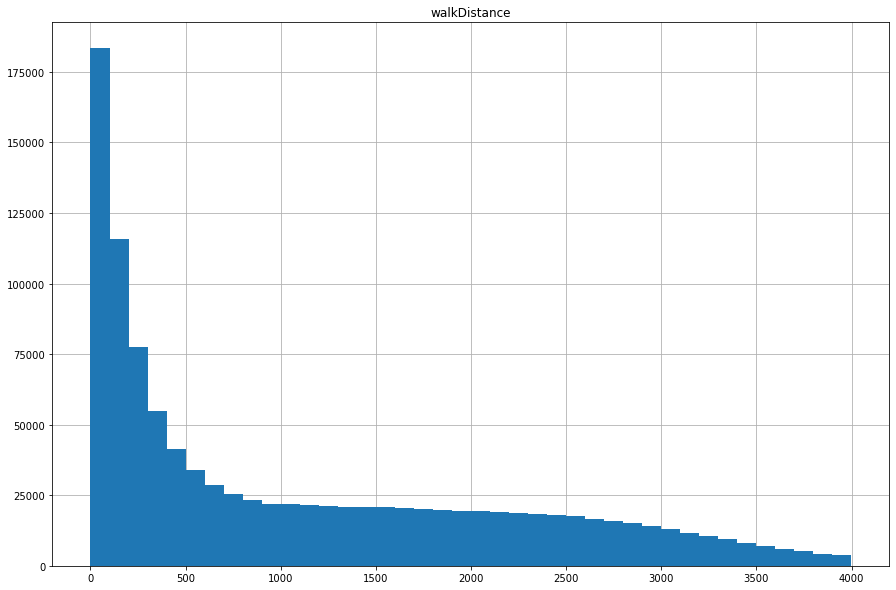

In [36]:
ride = df.query('rideDistance >0 & rideDistance <10000')
walk = df.query('walkDistance >0 & walkDistance <4000')
ride.hist('rideDistance', bins=40, figsize = (15,10))
walk.hist('walkDistance', bins=40, figsize = (15,10))
plt.show()

Plots above show that players mostly walk during a game. That's obvious when you think that vehicles are usually used just to loot more locations and to get a more strategic positions for attack and defend.

Now let's create a sum of walking, driving and swimming distances for each row.

<AxesSubplot:>

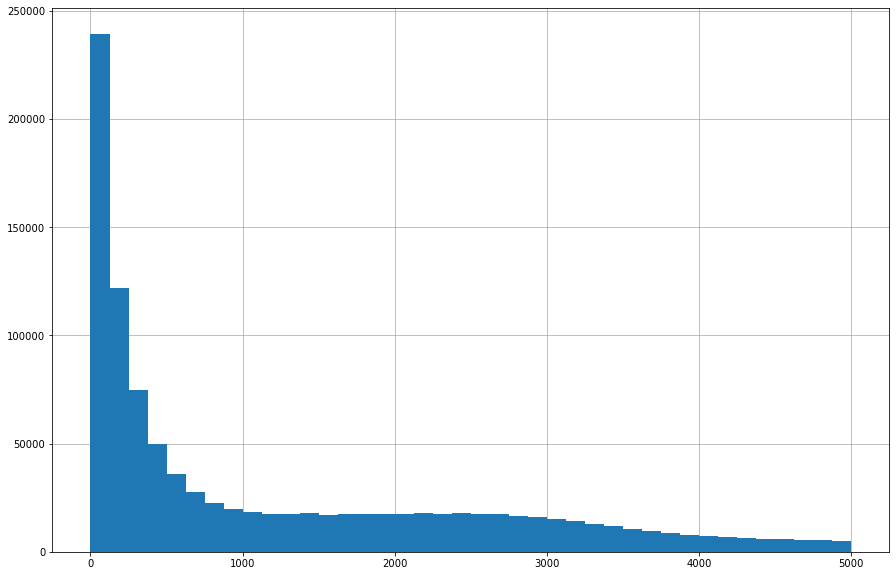

In [37]:
travel_dist = df["walkDistance"] + df["rideDistance"] + df["swimDistance"]
travel_dist = travel_dist[travel_dist<5000]
travel_dist.hist(bins=40, figsize = (15,10))

### e) Weapons acquired 

Average number of acquired weapons is 3.660, minimum is 0 and the maximum 177, 99% of players acquired less than weapons 10.0.


array([[<AxesSubplot:title={'center':'weaponsAcquired'}>]], dtype=object)

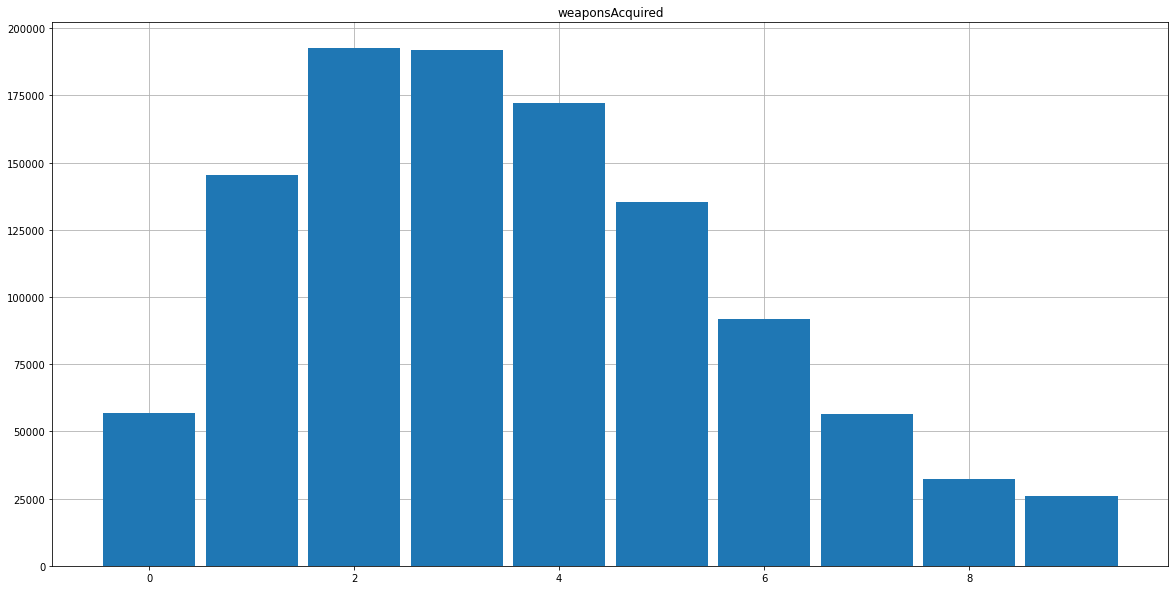

In [40]:
print("Average number of acquired weapons is {:.3f}, minimum is {} and the maximum {}, 99% of players acquired less than weapons {}." 
      .format(df["weaponsAcquired"].mean(), df["weaponsAcquired"].min(), df["weaponsAcquired"].max(), df["weaponsAcquired"].quantile(0.99)))
df.hist('weaponsAcquired', figsize = (20,10),range=(0, 10), align="left", rwidth=0.9)

### f) Correlation map 

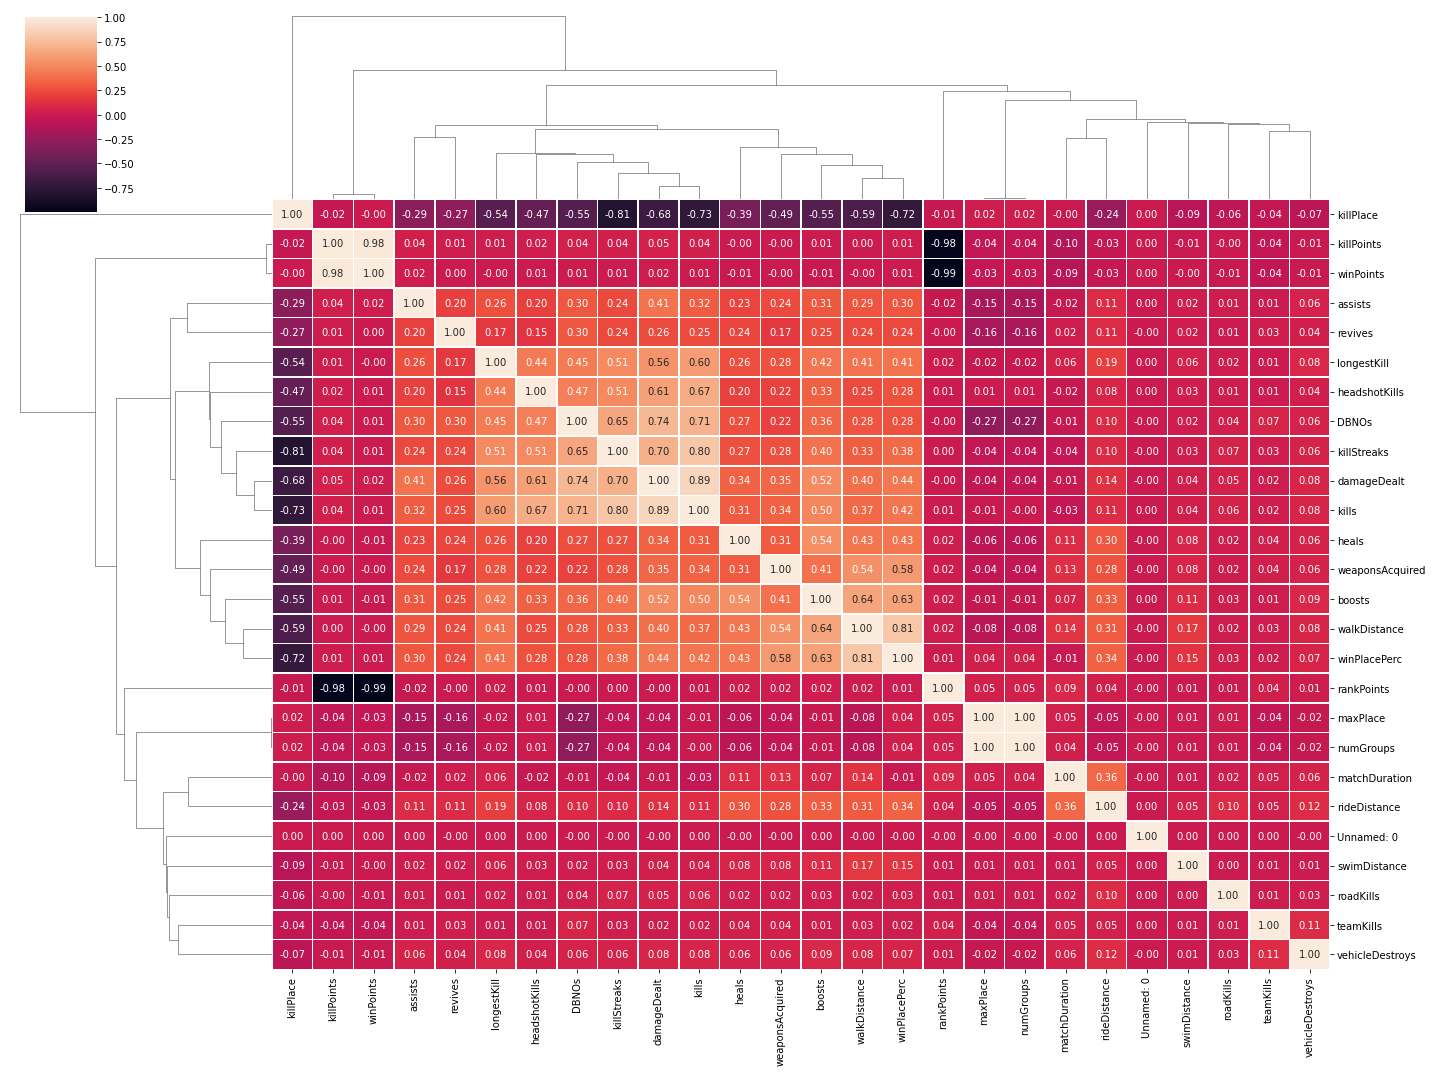

In [42]:
ax = sns.clustermap(df.corr(), annot=True, linewidths=.6, fmt= '.2f', figsize=(20, 15))
plt.show()

## 3-Analysis of TOP 10% of players 

TOP 10% overview

Average number of kills: 2.6
Minimum: 0
The best: 72
95% of players within: 8.0 kills.


<AxesSubplot:xlabel='kills', ylabel='damageDealt'>

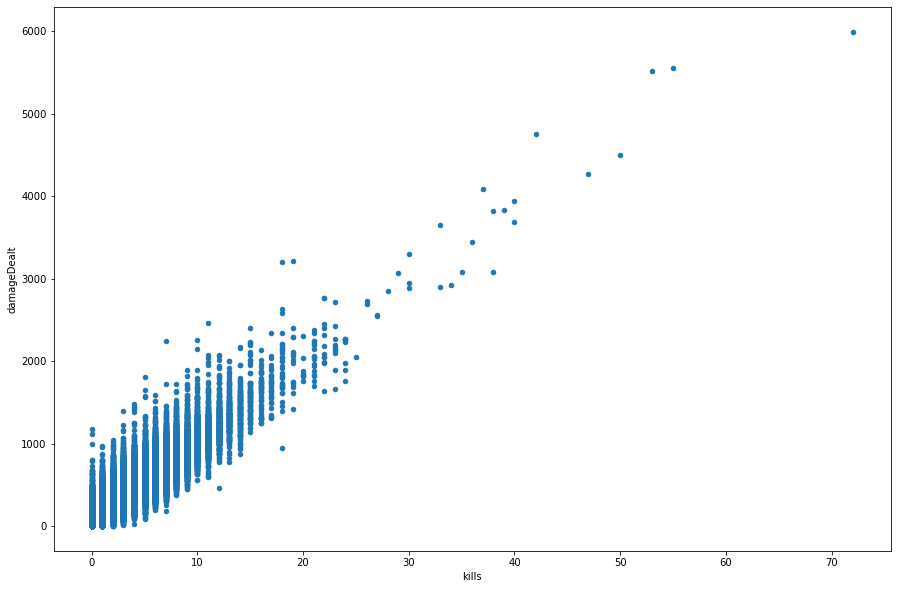

In [43]:
top10 = df[df["winPlacePerc"]>0.9]
print("TOP 10% overview\n")
print("Average number of kills: {:.1f}\nMinimum: {}\nThe best: {}\n95% of players within: {} kills." 
      .format(top10["kills"].mean(), top10["kills"].min(), top10["kills"].max(),top10["kills"].quantile(0.95)))

top10.plot(x="kills", y="damageDealt", kind="scatter", figsize = (15,10))

#### Let's see their way of travelling and compare this to the overall population.

Average walking distance: 2813.1505810157823


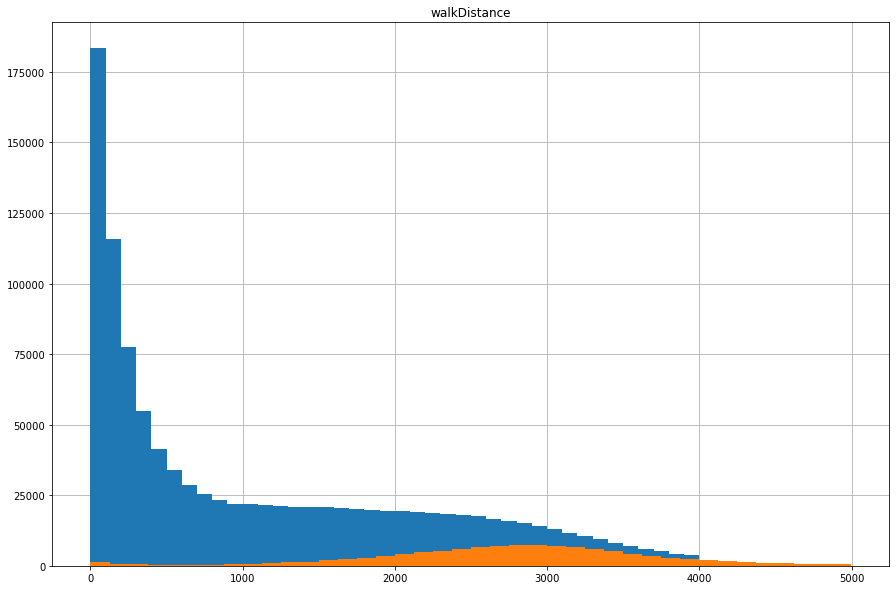

In [44]:
fig, ax1 = plt.subplots(figsize = (15,10))
walk.hist('walkDistance', bins=40, figsize = (15,10), ax = ax1)
walk10 = top10[top10['walkDistance']<5000]
walk10.hist('walkDistance', bins=40, figsize = (15,10), ax = ax1)

print("Average walking distance: " + str(top10['walkDistance'].mean()))

Average riding distance: 1396.5387151496416


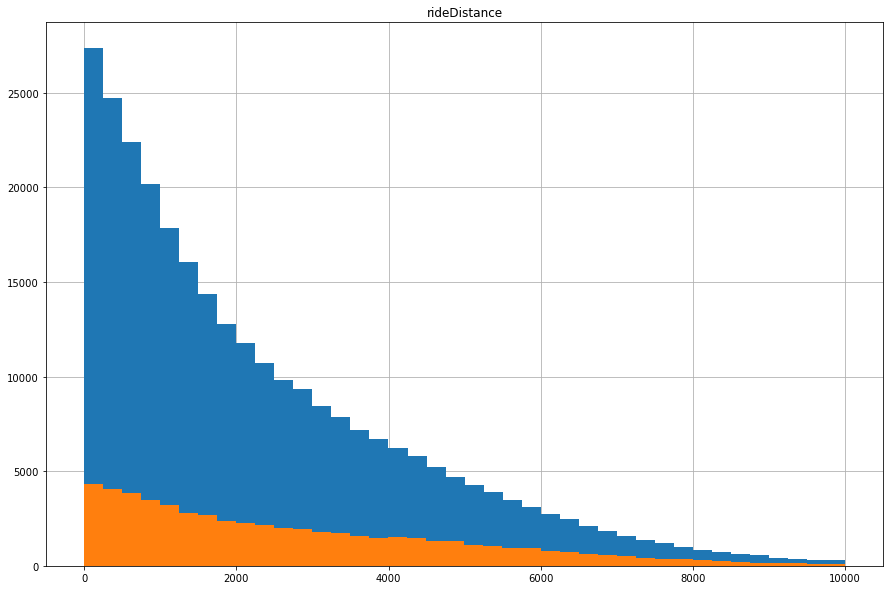

In [45]:
fig, ax1 = plt.subplots(figsize = (15,10))
ride.hist('rideDistance', bins=40, figsize = (15,10), ax = ax1)
ride10 = top10.query('rideDistance >0 & rideDistance <10000')
ride10.hist('rideDistance', bins=40, figsize = (15,10), ax = ax1)
print("Average riding distance: " + str(top10['rideDistance'].mean()))

#### What about the longest distances at which they scored their kills?

In [46]:
print("On average the best 10% of players have the longest kill at {:.3f} meters, and the best score is {:.1f} meters." .format(top10["longestKill"].mean(), top10["longestKill"].max()))

On average the best 10% of players have the longest kill at 74.937 meters, and the best score is 1040.0 meters.


#### Let's see now the correlations between the variables

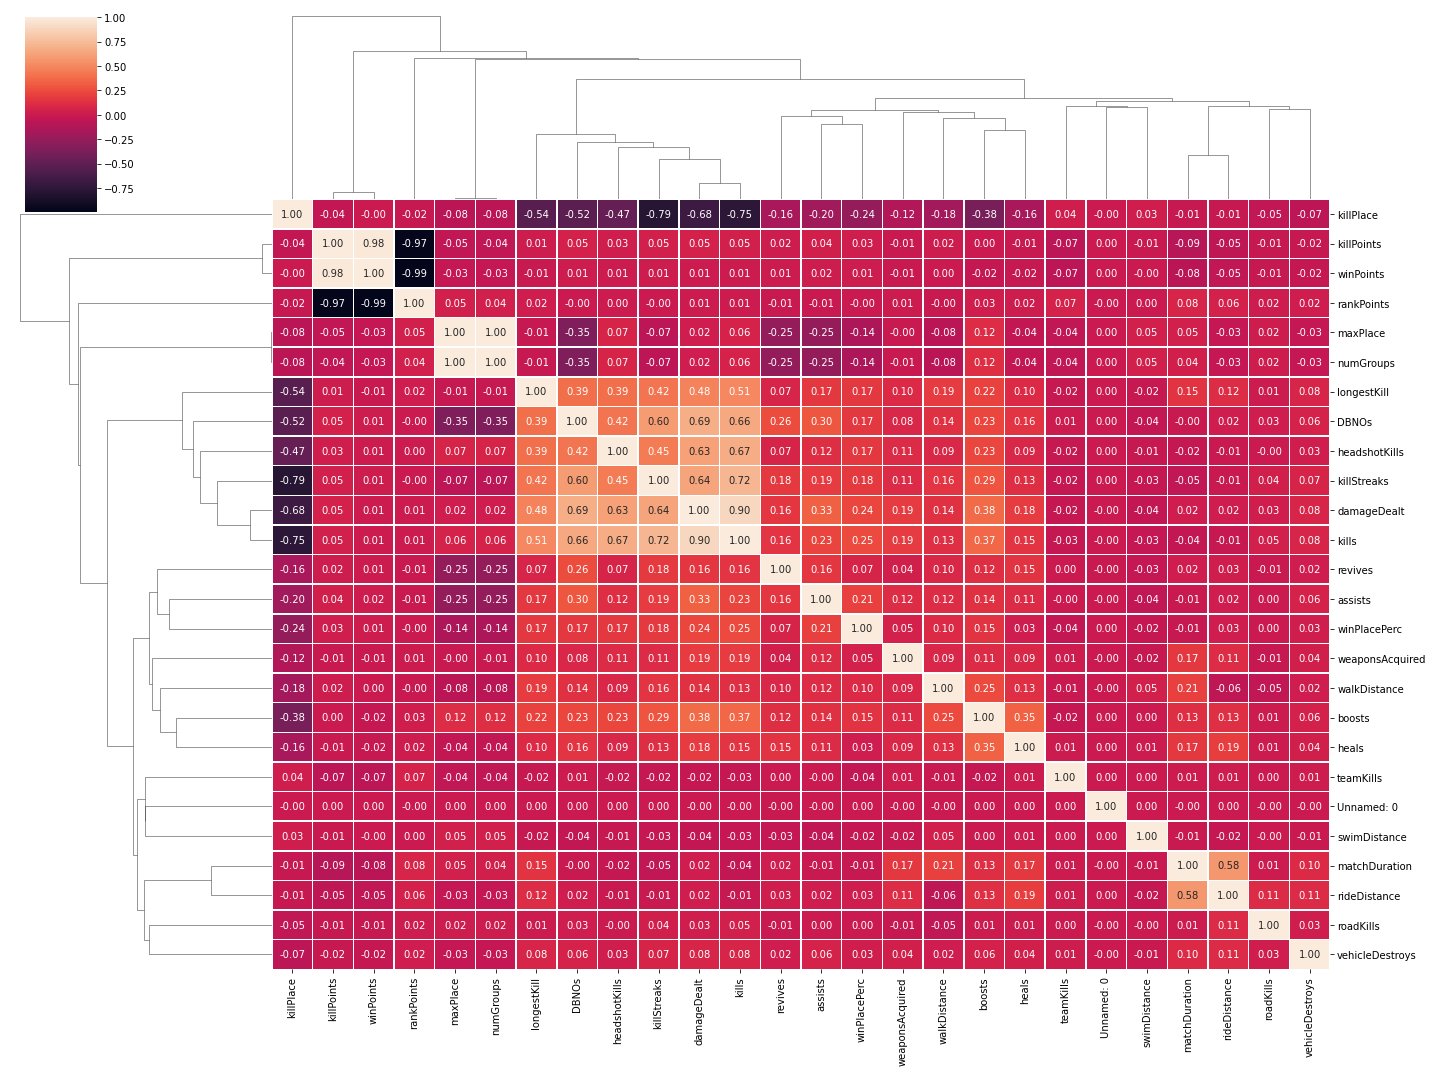

In [47]:
ax = sns.clustermap(top10.corr(), annot=True, linewidths=.5, fmt= '.2f', figsize=(20, 15))
plt.show()

Comparison of both clustertmap, for all and TOP 10% shows that the same columns seems to be of significant importance (I assume above 0.6 or below -0.6):
* rankPoints vs killPoints
* kills vs. damage dealt/DBNOs/headshotKills/killPlace
* killStreaks vs. damageDealt/killPlace/kills
* longestKill vs. damageDealt/kills
* walkDistance vs. killPlace
* winPoints vs. killPonts/rankPoints
* winPlacePerc vs. boosts/killPlace/walkDistance/weaponsAquired

![](3626476.jpg)